In [1]:
import numpy as np
import pandas as pd

In [2]:
right_knee = pd.read_excel(r'C:\Users\LEGION\Desktop\Trial1\1.xlsx')
right_knee.head()

,Frame,Time,jRK.X,jRK.Y,jRK.Z
0,0,0.00,-42.6,4.8,-3.0
1,1,0.01,-42.5,4.8,-3.0
2,2,0.02,-42.4,4.8,-3.0
3,3,0.03,-42.4,4.8,-3.1
4,4,0.04,-42.3,4.8,-3.1


In [3]:
right_hip = pd.read_excel(r'C:\Users\LEGION\Desktop\Trial1\2.xlsx')
right_hip.head()

,Frame,Time,jRHP.X,jRHP.Y,jRHP.Z
0,0,0.00,37.5,-5.0,-1.8
1,1,0.01,37.4,-5.0,-1.8
2,2,0.02,37.4,-5.0,-1.9
3,3,0.03,37.4,-5.0,-1.9
4,4,0.04,37.4,-5.0,-2.0


In [4]:
l1 = 19.375
l2 = 19.375

In [5]:
J1_new = right_knee[["  Time","     jRK.X"]]
J1_new.head()

,Time,jRK.X
0,0.00,-42.6
1,0.01,-42.5
2,0.02,-42.4
3,0.03,-42.4
4,0.04,-42.3


In [6]:
J2_new = right_hip[["  Time","    jRHP.X"]]
J2_new.head()

,Time,jRHP.X
0,0.00,37.5
1,0.01,37.4
2,0.02,37.4
3,0.03,37.4
4,0.04,37.4


In [7]:
def fun_name(J1_new,J2_new,l1,l2):
    time = np.array(J1_new['  Time'])
    print('time',time.shape)
    phi1 = np.array(J1_new['     jRK.X'])
    print('phi1',phi1.shape)
    phi2 = np.array(J2_new['    jRHP.X'])
    print('phi2',phi2.shape)
    phi1_avg = phi1.mean()
    phi2_avg = phi2.mean()
    X1 = np.array(l1*np.sin(np.radians(phi1)))
    Y1 = np.array(l1*np.cos(np.radians(phi1)))
    X2 = np.array(l2*np.sin(np.radians(phi2)) + 2*l1*np.sin(np.radians(phi1)))
    Y2 = np.array(l2*np.cos(np.radians(phi2)) + 2*l1*np.cos(np.radians(phi1)))
    print('X1',X1.shape)
    print('Y1',Y1.shape)
    print('X2',X2.shape)
    print('Y2',Y2.shape)
    X1_t = np.transpose(X1)
    X2_t = np.transpose(Y1)
    Y1_t = np.transpose(X2)
    Y2_t = np.transpose(Y2)
    phi1_t = np.transpose(phi1)
    phi2_t = np.transpose(phi2)
    Weight = 58.6  
    M1 = (0.11*Weight)-1.9+0.8;
    I1=0.5*M1*(l1*2)*(l1*2);
    M2=(0.18*Weight)+3.2+1.8;
    I2=0.5*M2*(l2*2)*(l2*2);
    M = np.array([[M1,0,0,0,0,0],
        [0,M1,0,0,0,0],
        [0,0,I1,0,0,0],
        [0,0,0,M2,0,0],
        [0,0,0,0,M2,0],
        [0,0,0,0,0,I2]])
    M_inv = np.linalg.inv(M)
    A = np.array([[1,0,-l1*np.cos(phi1_avg),0,0,0],
         [0,1,l1*np.sin(phi1_avg),0,0,0],
         [-1,0,-l1*np.cos(phi1_avg),1,0,-l2*np.cos(phi2_avg)],
         [0,-1,l1*np.sin(phi1_avg),0,1,l2*np.sin(phi2_avg)]])
    A_t = np.transpose(A)
    print('A_t',A_t.shape)
    Q = np.transpose(np.concatenate(([X1_t],[Y1_t], [phi1_t], [X2_t], [Y2_t], [phi2_t]), axis = 0))
    print('Q',Q.shape)
    G = np.array([0, -M1*9.81, 0, 0, -M2*9.81, 0])
    print('G',G.shape)
    B=np.array([[0,0],
       [0,0],
       [1,0],
       [0,0],
       [0,0],
       [0,1]])
    print('B',B.shape)
    Q_dot = np.gradient(Q, time, axis = 0)
    Q_doubledot = np.gradient(Q_dot, time, axis = 0)
    print('Q_doubledot',Q_doubledot.shape)
    C = np.matmul(Q_doubledot, A_t)
    print('C',C.shape)
    M_inv_A_t = np.array(np.matmul(M_inv,A_t))
    print('M_inv_A_t',M_inv_A_t.shape)
    A_M_inv = np.array(np.matmul(A,M_inv))
    print('A_M_inv',A_M_inv.shape)
    A_M_inv_A_t = np.array(np.matmul(A_M_inv,A_t))
    print('A_M_inv_A_t',A_M_inv_A_t.shape)
    M_inv_G = np.array(np.matmul(M_inv,G))
    print('M_inv_G',M_inv_G.shape)
    A_M_inv_G = np.array(np.matmul(A_M_inv,G))
    print('A_M_inv_G',A_M_inv_G.shape)
    M_inv_G_n_times = np.vstack([M_inv_G]*7604)
    print('M_inv_G_n_times',M_inv_G_n_times.shape)
    A_M_inv_G_n_times = np.vstack([A_M_inv_G]*7604)
    print('A_M_inv_G_n_times',A_M_inv_G_n_times.shape)
    
    left_array_top = np.hstack((M_inv,M_inv_A_t))
    print('left_array_top',left_array_top.shape)
    left_array_bottom = np.hstack((A_M_inv,A_M_inv_A_t))
    print('left_array_bottom',left_array_bottom.shape)
    left_array = np.vstack((left_array_top,left_array_bottom))
    print('left_array',left_array.shape)
    left_array_inv = np.linalg.inv(left_array)
    
    right_top = Q_doubledot - M_inv_G_n_times
    print('right_top',right_top.shape)
    right_bottom = C - A_M_inv_G_n_times
    print('right_bottom',right_bottom.shape)
    right_array = np.hstack((right_top,right_bottom))
    print('right_array',right_array.shape)
    
    solution = right_array @  left_array_inv 
    print('solution',solution.shape)
    print('right_array',right_array)
    #np.savetxt("firstarray.csv", solution, delimiter=",")
    
    


In [8]:
fun_name(J1_new,J2_new,l1,l2)

time (7604,)
phi1 (7604,)
phi2 (7604,)
X1 (7604,)
Y1 (7604,)
X2 (7604,)
Y2 (7604,)
A_t (6, 4)
Q (7604, 6)
G (6,)
B (6, 2)
Q_doubledot (7604, 6)
C (7604, 4)
M_inv_A_t (6, 4)
A_M_inv (4, 6)
A_M_inv_A_t (4, 4)
M_inv_G (6,)
A_M_inv_G (4,)
M_inv_G_n_times (7604, 6)
A_M_inv_G_n_times (7604, 4)
left_array_top (6, 10)
left_array_bottom (4, 10)
left_array (10, 10)
right_top (7604, 6)
right_bottom (7604, 4)
right_array (7604, 10)
solution (7604, 10)
right_array [[ 1.99365353e-01  1.44437693e+02 -1.42108547e-11 ...  1.44437693e+02
  -9.52594306e+03  1.52621418e+03]
 [-6.21794174e+01  1.96801271e+01 -2.50000000e+02 ... -3.75762703e+03
  -6.48848519e+03 -2.24045453e+03]
 [-6.21796075e+01 -4.74347339e+01 -2.50000000e+02 ... -3.82474189e+03
  -1.72572211e+03 -3.00397852e+03]
 ...
 [ 1.22442026e+02  2.54694053e+02  5.00000000e+02 ...  7.80930836e+03
  -6.07011934e+03  7.54293018e+03]
 [ 6.13736422e+01  1.32557284e+02  2.50000000e+02 ...  3.90986444e+03
  -3.03537258e+03  3.77083928e+03]
 [ 2.03505383e

In [9]:
import matplotlib.pyplot as plt 
import pandas as pd

In [17]:
df = pd.read_csv(r"C:\Users\LEGION\Desktop\file.csv")
df.head()

,Time,T_1,T_2,T_3,T_4,T_5,T_6,F_1,F_2,F_3,F_4,Total_torque,Total_force
0,0.000,17300.0,-163000.0,-2380000.0,229000.0,434000.0,945000.0,-195000.0,-127000.0,-524000.0,-524000.0,-1440000.0,-1370000.0
1,0.005,14900.0,-335000.0,-1750000.0,90000.0,370000.0,1510000.0,-165000.0,-136000.0,-524000.0,-393000.0,-240000.0,-1220000.0
2,0.010,11400.0,8060.0,-829000.0,-137000.0,39300.0,2320000.0,-162000.0,-55900.0,0.0,-65500.0,1490000.0,-283000.0
3,0.015,-1750.0,62300.0,1200000.0,-149000.0,-146000.0,-1760000.0,-47700.0,77900.0,262000.0,0.0,-560000.0,292000.0
4,0.020,-10500.0,60900.0,931000.0,-23300.0,-112000.0,-1430000.0,-80000.0,77200.0,131000.0,131000.0,-499000.0,259000.0


<function matplotlib.pyplot.show(close=None, block=None)>

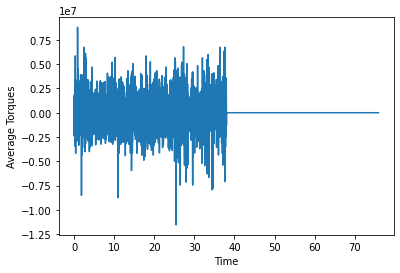

In [11]:
plt.plot(df['Time'],df['Total_torque'] / 2)
plt.xlabel('Time')
plt.ylabel('Average Torques')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

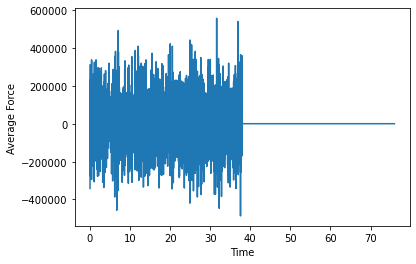

In [12]:
plt.plot(df['Time'],df['Total_force'] / 4)
plt.xlabel('Time')
plt.ylabel('Average Force')
plt.show

In [13]:
df1 = pd.read_csv(r"C:\Users\LEGION\Desktop\File1.csv")
df1.columns

Index(['Frame', 'Time', 'r gr.X', 'r gr.Y', 'r gr.Z', 'l gr.X', 'l gr.Y',
       'l gr.Z', ' ', 'torque'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

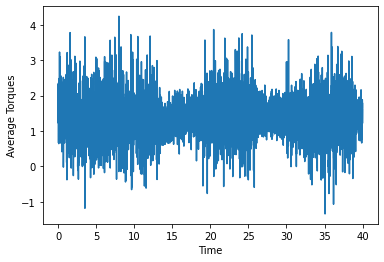

In [22]:
plt.plot(df1[0:8000]['Time'],df1[0:8000]['r gr.Y'])
plt.xlabel('Time')
plt.ylabel('Average Torques')
plt.show

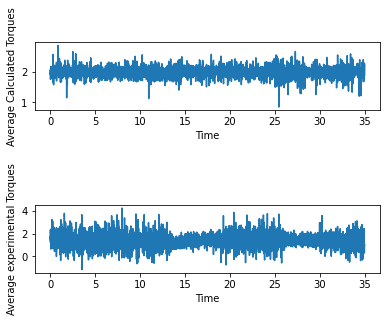

In [35]:
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=1.4)

plt.subplot(2, 1, 1)
plt.plot(df[0:7000]['Time'],(df[0:7000]['Total_torque']))
plt.xlabel('Time')
plt.ylabel('Average Calculated Torques')
#plot 2:

plt.subplot(2, 1, 2)
plt.plot(df1[0:7000]['Time'],df1[0:7000]['r gr.Y'])
plt.xlabel('Time')
plt.ylabel('Average experimental Torques')
plt.show()